In [ ]:
import torch
import pandas as pd
import torch.nn as nn # All neural network modules, nn.Linear, nn.Conv2d, BatchNorm, Loss functions
import torch.optim as optim # For all Optimization algorithms, SGD, Adam, 
import torch.nn.functional as F # All functions that don't have any parameters
from torch.utils.data import DataLoader # Gives easier dataset managment and creates mini batches
import torchvision.transforms as transforms # Transformations we can perform on our dataset
### plot the loss function
import matplotlib.pyplot as plt
%matplotlib inline


Pytorch

In [ ]:
import pandas as pd
df=pd.read_csv('diabetes.csv', header = None)
df.head()

,0,1,2,3,4,5,6,7,8
0,-0.294118,0.487437,0.180328,-0.292929,0.000000,0.001490,-0.531170,-0.033333,0
1,-0.882353,-0.145729,0.081967,-0.414141,0.000000,-0.207153,-0.766866,-0.666667,1
2,-0.058824,0.839196,0.049180,0.000000,0.000000,-0.305514,-0.492741,-0.633333,0
3,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,0.000000,1
4,0.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000,0


In [ ]:
# reanming the DataFrame columns
df = df.set_axis(['V', 'W', 'X', 'Y', 'Z','A','B','C','Outcome'], axis=1, inplace=False);

In [ ]:
df.shape

(759, 9)

In [ ]:
df.isnull().sum()
#There are no missing values present in the dataset

V          0
W          0
X          0
Y          0
Z          0
A          0
B          0
C          0
Outcome    0
dtype: int64

In [ ]:
df.dtypes

V          float64
W          float64
X          float64
Y          float64
Z          float64
A          float64
B          float64
C          float64
Outcome      int64
dtype: object

In [ ]:
sns.countplot(data=df,x='Outcome')

NameError: ignored

In [ ]:
#figure size
plt.figure(figsize=(10, 7))
#correlation matrix
dataplot = sns.heatmap(df.corr(), annot=True, fmt='.2f')

In [ ]:
import seaborn as sns

In [ ]:
df.head()

In [ ]:
df.tail()

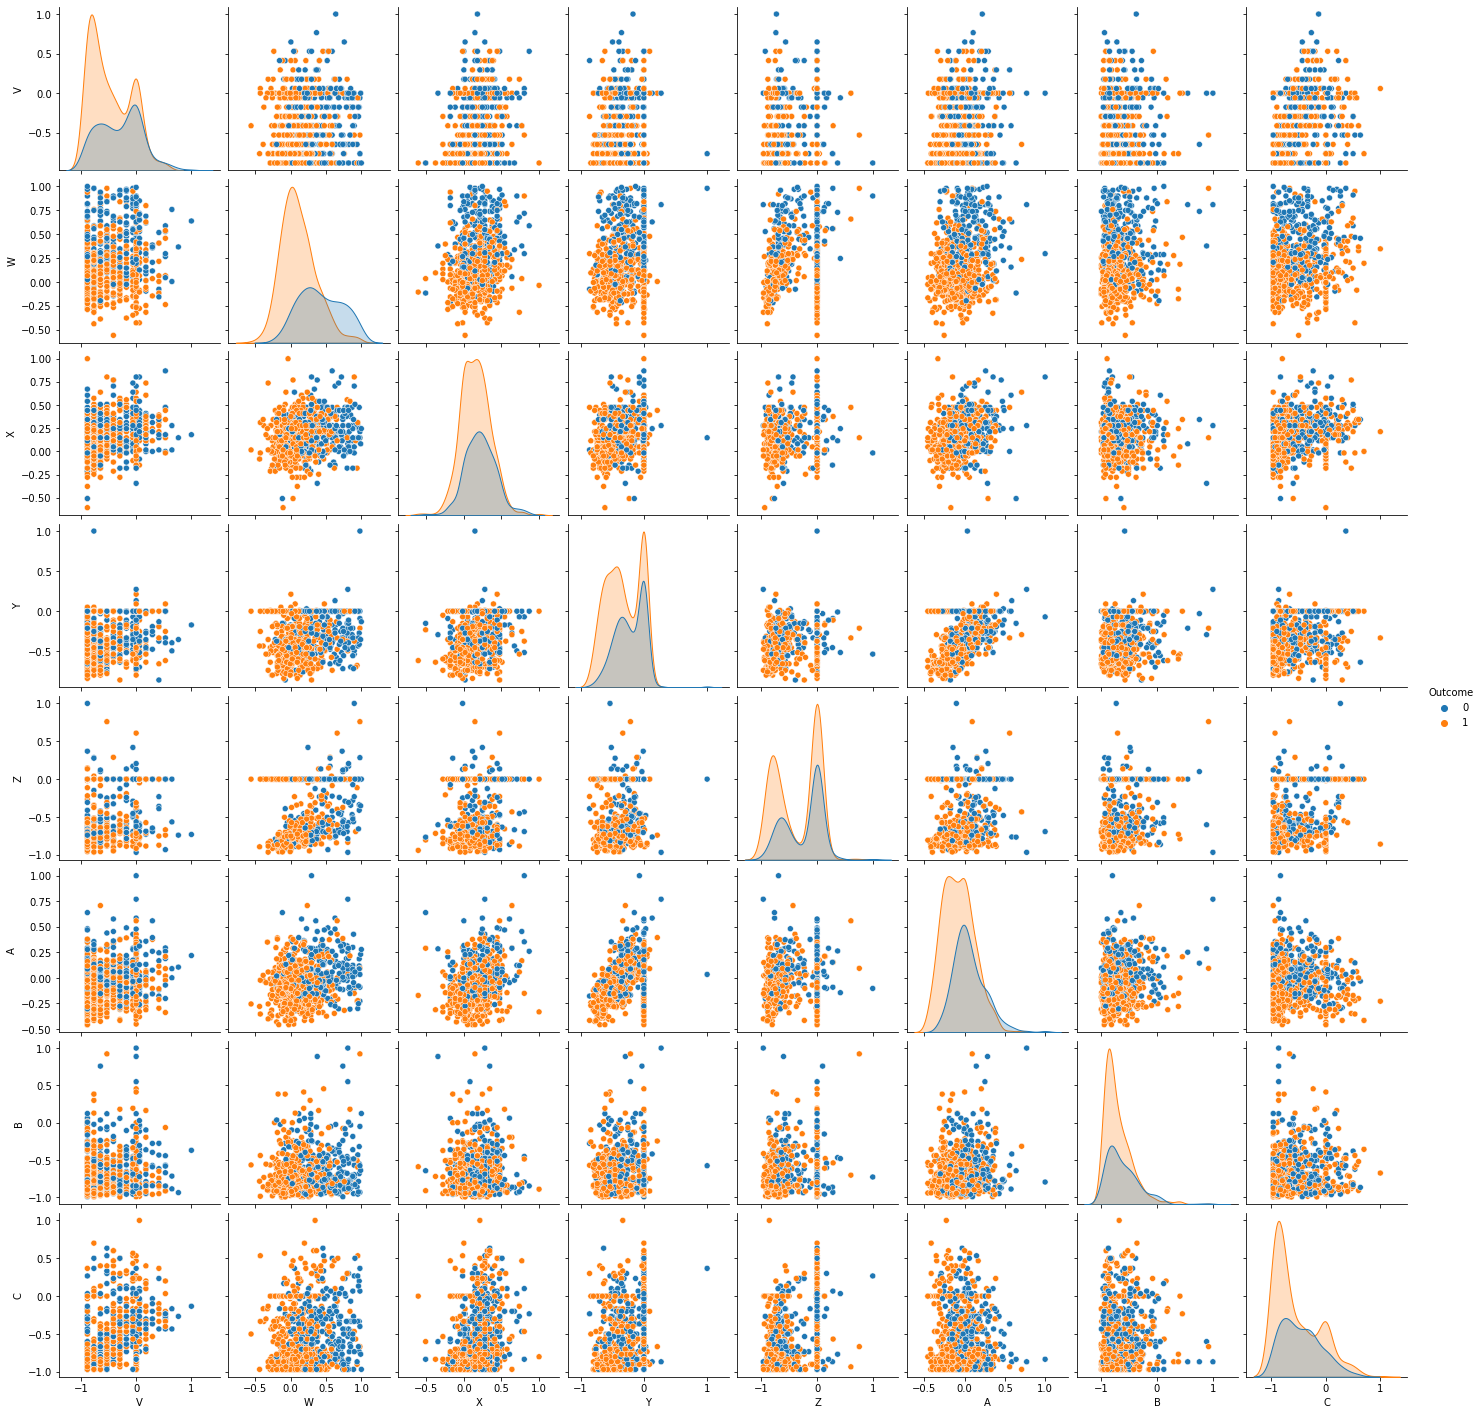

In [ ]:
sns.pairplot(df,hue="Outcome")

In [ ]:
X=df.drop('Outcome',axis=1).values### independent features
y=df['Outcome'].values###dependent feature

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
##### Creating Tensors
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

In [ ]:
df.shape

(759, 9)

In [ ]:
# #Hyperparameters

# input_size 
# num_classes
# batch_size
# learning_rate = 0.01
# num_epochs

In [ ]:
#### Creating Model with Pytorch

class ANN_Model(nn.Module):
    def __init__(self,input_features=8,hidden1=25,hidden2=25,out_features=2):
        super().__init__()
        self.f_connected1=nn.Linear(input_features,hidden1)
        self.f_connected2=nn.Linear(hidden1,hidden2)
        self.out=nn.Linear(hidden2,out_features)
    def forward(self,x):
        x=F.relu(self.f_connected1(x))
        x=F.relu(self.f_connected2(x))
        x=self.out(x)
        return x

In [ ]:
####instantiate model
torch.manual_seed(20)
model=ANN_Model()


In [ ]:
model.parameters

<bound method Module.parameters of ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=25, bias=True)
  (f_connected2): Linear(in_features=25, out_features=25, bias=True)
  (out): Linear(in_features=25, out_features=2, bias=True)
)>

In [ ]:
###Backward Propogation-- Define the loss_function,define the optimizer
loss_function=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr =0.01)

In [ ]:
epochs=100
final_losses=[]
for i in range(epochs):
    i=i+1
    y_pred=model.forward(X_train)
    loss=loss_function(y_pred,y_train)
    final_losses.append(loss)
    if i%10==1:
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number: 1 and the loss : 0.6895986199378967
Epoch number: 11 and the loss : 0.5818946361541748
Epoch number: 21 and the loss : 0.491255521774292
Epoch number: 31 and the loss : 0.4664565622806549
Epoch number: 41 and the loss : 0.4501835107803345
Epoch number: 51 and the loss : 0.43524324893951416
Epoch number: 61 and the loss : 0.4221603274345398
Epoch number: 71 and the loss : 0.40990519523620605
Epoch number: 81 and the loss : 0.399588406085968
Epoch number: 91 and the loss : 0.3900630474090576


In [ ]:
#### Prediction In X_test data
predictions=[]
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_pred=model(data)
        predictions.append(y_pred.argmax().item())
        print(y_pred.argmax().item())

1
0
1
1
0
1
1
1
1
1
1
1
1
0
1
1
0
0
0
0
1
1
1
1
1
1
1
1
1
0
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
1
1
0
1
1
1
1
0
0
1
1
1
1
1
1
1
1
1
1
1
0
1
0
0
0
1
1
1
1
1
1
1
0
0
1
1
0
1
1
1
1
0
1
1
1
0
1
0
1
0
0
0
1
1
1
1
1
0
1
0
1
1
1
0
0
1
1
1
0
1
1
1
0
1
0
0
1
1
0
1
1
1
1
0
0
1
1
1
0
0
1
1
1
1
0
0


In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predictions)
cm

array([[29, 18],
       [15, 90]])

Text(69.0, 0.5, 'Predicted Values')

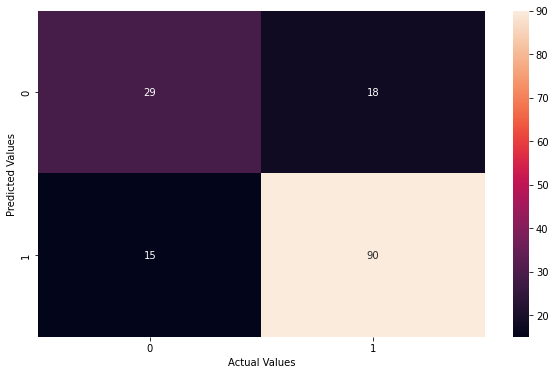

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [ ]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,predictions)
score

0.7828947368421053

In [ ]:
#### Save the model
torch.save(model,'diabetes.pt')

In [ ]:
#### Save And Load the model
model=torch.load('diabetes.pt')

In [ ]:
model.eval()

ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=25, bias=True)
  (f_connected2): Linear(in_features=25, out_features=25, bias=True)
  (out): Linear(in_features=25, out_features=2, bias=True)
)

#Hypothesis

>1.Change the size if epochs when hidden layers are increased from 20 to 40 , the loss reduces to 0.32496535778045654(epochs=100) but accuracy_score falls to 73% hidden layers= 25, loss = 0.3842785656452179 , acc = 75% 

### Observations

> Hidden layers= 20 

1.   Epochs= 50 , accuarcy = 75% , loss = 0.43626126646995544

2.   Epochs= 100 , accuacy = 75% , loss = 0.43626126646995544

3.   Epochs= 500 , accuarcy = 75% , loss = 0.43626126646995544



> Hidden Layer = 25

1. Epochs= 100 , accuarcy = 75% , loss = 0.3842785656452179










> Summary




The changes in hidden layers makes a difference in the loss function and the accuarcy of the model. Adding more hidden layers incraeses the complexity and running time of the model,having many hidden layers,we can reduce the training error but still have high generalization error due to overfitting and high variance.





References:


>
*   https://www.kaggle.com/code/kredy10/simple-neural-network-for-diabetes-prediction/notebook

*   https://www.youtube.com/watch?v=Jy4wM2X21u0

*   https://jovian.ai/omveersharmanet/creating-ann-with-pytorch-on-pima-diabetes-dataset
*   





